In [2]:
%load_ext autoreload
%autoreload 2

from pyba.CameraNetwork import CameraNetwork
import pickle
import glob
import numpy as np
from config import df3d_colors, df3d_bones

image_path = './data/test/camera_{cam_id}_img_00000{img_id}.jpg'
pr_path = './data/test/df3d_2/pose_result*.pkl'
d = pickle.load(open(glob.glob(pr_path)[0], 'rb'))
points2d = d['points2d']

camNet = CameraNetwork(points2d=points2d, calib=d, image_path=image_path, bones=df3d_bones, colors=df3d_colors)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-0.5, 6719.5, 479.5, -0.5)

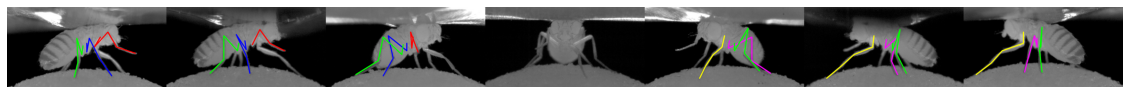

In [3]:
import matplotlib.pyplot as plt
img = camNet.plot_2d(0, points='points2d')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')


In [10]:
import matplotlib.pyplot as plt
#camNet._points3d = d['points3d']
img = camNet.plot_2d(0, points='reprojection')
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.axis('off')

TypeError: function takes exactly 2 arguments (38 given)

In [22]:
from pyba.pyba import bundle_adjust 

In [31]:
bundle_adjust(camNet)

(1710, 2) (1710,)
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.1659e+05                                    7.27e+05    
       1              2         2.9376e+05      4.23e+05       1.08e+01       3.12e+05    
       2              4         2.6084e+05      3.29e+04       2.39e+00       1.85e+05    
       3              5         2.4676e+05      1.41e+04       3.04e+00       2.20e+04    
       4              7         2.4604e+05      7.20e+02       1.32e+00       1.75e+04    
       5              8         2.4579e+05      2.53e+02       2.67e+00       2.86e+04    
       6              9         2.4487e+05      9.20e+02       2.53e+00       2.18e+04    
       7             10         2.4472e+05      1.43e+02       2.48e+00       2.02e+04    
       8             11         2.4441e+05      3.18e+02       6.71e-01       1.77e+03    
       9             12         2.4440e+05      9.43e+00       6.78e-01 

 active_mask: array([0., 0., 0., ..., 0., 0., 0.])
        cost: 244396.77590666807
         fun: array([  6.52304181,  -1.95642366,  -7.16293791, ..., -31.62837023,
        15.88244272,  -7.20774893])
        grad: array([-1.23865310e+03,  2.31330650e+02,  4.93021078e+02, ...,
        1.88988783e-01,  2.76772641e+00, -1.12586604e+01])
         jac: <3420x1801 sparse matrix of type '<class 'numpy.float64'>'
	with 54720 stored elements in Compressed Sparse Row format>
     message: '`ftol` termination condition is satisfied.'
        nfev: 12
        njev: 10
  optimality: 2126.094421961034
      status: 2
     success: True
           x: array([ 0.04354803, -0.41370977, -0.04149688, ...,  0.327105  ,
       -1.77505847,  0.83911295])

In [32]:
camNet.reprojection_error()

[7.956716830816002,
 7.687260874869759,
 5.834780952762087,
 0.0,
 6.322633141790358,
 7.5662533501055265,
 9.002616597742175]

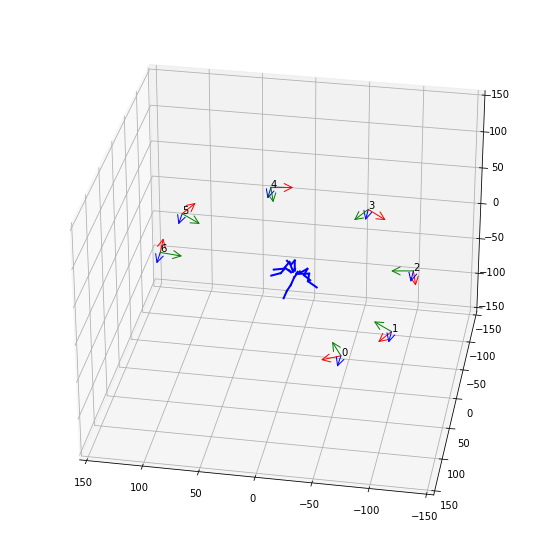

In [11]:
fig = plt.figure(figsize=(10,10))
ax3d = fig.add_subplot(111, projection='3d')
camNet.draw(ax3d, size=20)
camNet.plot_3d(ax3d, img_id=0, size=10)
plt.xlim([-150, 150])
plt.ylim([-150, 150])
ax3d.set_zlim([-150, 150])

ax3d.view_init(30,100)

In [12]:
x[0][]

[0, 1]